# Code and Resources

### We attempted to Scrap data from Flipkart through Web Scraping to analyze the dataset using python. 

# Importing all libraries

In [1]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# url

In [2]:
url='https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=TRENDING&suggestionId=mobiles&requestId=621b6dee-2a97-40c5-a0a5-b28ed8c9c328'

In [3]:
# to check status code
r=requests.get(url)
r.status_code

200

In [4]:
#to print
#print(r.text)

In [5]:
# convert into html
soup=BeautifulSoup(r.content,'lxml')
#soup

In [6]:
#print(soup.prettify())

# to display title

In [8]:
soup.title.string

'Mobiles- Buy Products Online at Best Price in India - All Categories | Flipkart.com'

# division or a section in an HTML document

In [7]:
# to check div
#soup.div

# to display all hyperlink

In [8]:
# show all the hyperlink
#soup.find_all('a')

# to display all tables

In [11]:
#to display all tables
all_tables=soup.find_all('table')
print(all_tables)

[]


# to display result

In [12]:
results = soup.find_all('a',{'class':"_1fQZEK"})
len(results)

24

In [9]:
#results

In [14]:
# picking the 1st card from the complete list of cards
item = results[0]

In [10]:
#item

In [16]:
# Extracting the model of the phone from the 1st card
model = item.find('div',{'class':"_4rR01T"}).text
model

'SAMSUNG Galaxy F12 (Sea Green, 64 GB)'

In [17]:
# Extracting Stars from 1st card
star = item.find('div',{'class':"_3LWZlK"}).text
star

'4.2'

In [19]:
# Extracting Number of Ratings from 1st card
num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
num_ratings

'1,89,240 Ratings'

In [20]:
# Extracting Number of Reviews from 1st card
reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
reviews

'15,027 Reviews'

In [21]:
# Extracting RAM from the 1st card
ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
ram

'4 GB RAM '

In [23]:
# Extracting Storage/ROM from 1st card
storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:11].strip()
storage

'64 GB ROM'

In [24]:
# Extracting the display option from the 1st card
display = item.find_all('li')[1].text.strip()
display

'16.55 cm (6.515 inch) HD+ Display'

In [25]:
# Extracting camera options from the 1st card
camera = item.find_all('li')[2].text.strip()
camera

'48MP + 5MP + 2MP + 2MP | 8MP Front Camera'

In [26]:
# Extracting the battery option from the 1st card
battery = item.find_all('li')[3].text
battery

'6000 mAh Lithium-ion Battery'

In [27]:
#price of porduct
prices=soup.findAll('div',{'class':"_30jeq3 _1_WHN1"})
prices

[<div class="_30jeq3 _1_WHN1">₹9,499</div>,
 <div class="_30jeq3 _1_WHN1">₹12,499</div>,
 <div class="_30jeq3 _1_WHN1">₹11,499</div>,
 <div class="_30jeq3 _1_WHN1">₹7,499</div>,
 <div class="_30jeq3 _1_WHN1">₹7,499</div>,
 <div class="_30jeq3 _1_WHN1">₹11,499</div>,
 <div class="_30jeq3 _1_WHN1">₹12,499</div>,
 <div class="_30jeq3 _1_WHN1">₹9,499</div>,
 <div class="_30jeq3 _1_WHN1">₹8,999</div>,
 <div class="_30jeq3 _1_WHN1">₹8,999</div>,
 <div class="_30jeq3 _1_WHN1">₹10,499</div>,
 <div class="_30jeq3 _1_WHN1">₹10,499</div>,
 <div class="_30jeq3 _1_WHN1">₹9,499</div>,
 <div class="_30jeq3 _1_WHN1">₹7,499</div>,
 <div class="_30jeq3 _1_WHN1">₹9,499</div>,
 <div class="_30jeq3 _1_WHN1">₹7,499</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>,
 <div class="_30jeq3 _1_WHN1">₹8,999</div>,
 <div class="_30jeq3 _1_WHN1">₹8,999</div>,
 <div class="_30jeq3 _1_WHN1">₹13,999</div>,
 <div class="_30jeq3 _1_WHN1">₹28,999</div>,
 <div class="_30jeq3 _1_WHN1">₹8,990</div>,
 <div class="_30jeq3 _1

In [28]:
def extract_phone_model_info(item):
  
    # Extracting the model of the phone from the 1st card
    model = item.find('div',{'class':"_4rR01T"}).text
    # Extracting Stars from 1st card
    star = item.find('div',{'class':"_3LWZlK"}).text
    # Extracting Number of Ratings from 1st card
    num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
    # Extracting Number of Reviews from 1st card
    reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
    # Extracting RAM from the 1st card
    ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
    # Extracting Storage/ROM from 1st card
    storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].strip()
    
    # Extracting the display option from the 1st card
    display = item.find_all('li')[1].text.strip()
    # Extracting camera options from the 1st card
    camera = item.find_all('li')[2].text.strip()
    # Extracting the battery option from the 1st card
    battery = item.find_all('li')[3].text
    
    result = (model,star,num_ratings,reviews,ram,storage,display,camera,battery)
    return result

In [29]:
# Now putting all the information from all the cards/phone models and putting them into a list
records_list = []
results = soup.find_all('a',{'class':"_1fQZEK"})
for item in results:
    records_list.append(extract_phone_model_info(item))

In [30]:
records_list

[('SAMSUNG Galaxy F12 (Sea Green, 64 GB)',
  '4.2',
  '1,89,240 Ratings',
  '15,027 Reviews',
  '4 GB RAM ',
  '64 GB ROM',
  '16.55 cm (6.515 inch) HD+ Display',
  '48MP + 5MP + 2MP + 2MP | 8MP Front Camera',
  '6000 mAh Lithium-ion Battery'),
 ('realme Narzo 50A (Oxygen Green, 128 GB)',
  '4.4',
  '1,75,810 Ratings',
  '10,901 Reviews',
  '4 GB RAM ',
  '128 GB RO',
  '16.51 cm (6.5 inch) HD+ Display',
  '50MP + 2MP + 2MP | 8MP Front Camera',
  '6000 mAh Battery'),
 ('realme Narzo 50A (Oxygen Blue, 64 GB)',
  '4.4',
  '1,75,810 Ratings',
  '10,901 Reviews',
  '4 GB RAM ',
  '64 GB ROM',
  '16.51 cm (6.5 inch) HD+ Display',
  '50MP + 2MP + 2MP | 8MP Front Camera',
  '6000 mAh Battery'),
 ('realme Narzo 50i (Mint Green, 32 GB)',
  '4.5',
  '37,384 Ratings',
  '1,548 Reviews',
  '2 GB RAM ',
  '32 GB ROM',
  '16.51 cm (6.5 inch) Display',
  '8MP Rear Camera | 5MP Front Camera',
  '5000 mAh Battery'),
 ('realme Narzo 50i (Carbon Black, 32 GB)',
  '4.5',
  '37,384 Ratings',
  '1,548 Revie

In [31]:
data=pd.DataFrame(records_list,columns=['model',"star","num_ratings"
   ,"reviews",'ram',"storage","display","camera","battery"])

In [32]:
data

,model,star,num_ratings,reviews,ram,storage,display,camera,battery
0,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",4.2,"1,89,240 Ratings","15,027 Reviews",4 GB RAM,64 GB ROM,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery
1,"realme Narzo 50A (Oxygen Green, 128 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,128 GB RO,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery
2,"realme Narzo 50A (Oxygen Blue, 64 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery
3,"realme Narzo 50i (Mint Green, 32 GB)",4.5,"37,384 Ratings","1,548 Reviews",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery
4,"realme Narzo 50i (Carbon Black, 32 GB)",4.5,"37,384 Ratings","1,548 Reviews",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery
5,"realme Narzo 50A (Oxygen Green, 64 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery
6,"realme Narzo 50A (Oxygen Blue, 128 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,128 GB RO,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery
7,"realme C21Y (Cross Blue, 32 GB)",4.6,"35,185 Ratings","1,093 Reviews",3 GB RAM,32 GB ROM,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Battery
8,"realme Narzo 50i (Carbon Black, 64 GB)",4.3,"23,145 Ratings","1,188 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery
9,"realme Narzo 50i (Mint Green, 64 GB)",4.3,"23,145 Ratings","1,188 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery


In [33]:
#to add price column in dataset
data['price'] = prices

In [35]:
data

,model,star,num_ratings,reviews,ram,storage,display,camera,battery,price
0,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",4.2,"1,89,240 Ratings","15,027 Reviews",4 GB RAM,64 GB ROM,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,"[₹9,499]"
1,"realme Narzo 50A (Oxygen Green, 128 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,128 GB RO,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹12,499]"
2,"realme Narzo 50A (Oxygen Blue, 64 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹11,499]"
3,"realme Narzo 50i (Mint Green, 32 GB)",4.5,"37,384 Ratings","1,548 Reviews",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹7,499]"
4,"realme Narzo 50i (Carbon Black, 32 GB)",4.5,"37,384 Ratings","1,548 Reviews",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹7,499]"
5,"realme Narzo 50A (Oxygen Green, 64 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹11,499]"
6,"realme Narzo 50A (Oxygen Blue, 128 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,128 GB RO,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹12,499]"
7,"realme C21Y (Cross Blue, 32 GB)",4.6,"35,185 Ratings","1,093 Reviews",3 GB RAM,32 GB ROM,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Battery,"[₹9,499]"
8,"realme Narzo 50i (Carbon Black, 64 GB)",4.3,"23,145 Ratings","1,188 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹8,999]"
9,"realme Narzo 50i (Mint Green, 64 GB)",4.3,"23,145 Ratings","1,188 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹8,999]"


# Storing Raw data in CSV Format

In [36]:
data.to_csv('Scrapted_Data.csv')

# to display top 5 data from dataframe

In [101]:
data.head()

,model,star,num_ratings,reviews,ram,storage,display,camera,battery,price
0,"realme Narzo 50i (Mint Green, 32 GB)",4.5,"37,384 Ratings","1,548 Reviews",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹7,499]"
1,"realme Narzo 50i (Carbon Black, 32 GB)",4.5,"37,384 Ratings","1,548 Reviews",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹7,499]"
2,"realme Narzo 50A (Oxygen Blue, 128 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,128 GB RO,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹12,499]"
3,"realme Narzo 50A (Oxygen Green, 64 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹11,499]"
4,"realme Narzo 50A (Oxygen Blue, 64 GB)",4.4,"1,75,810 Ratings","10,901 Reviews",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,"[₹11,499]"


# to display bottom 5 data from dataframe

In [102]:
data.tail()

,model,star,num_ratings,reviews,ram,storage,display,camera,battery,price
19,"REDMI 9i Sport (Metallic Blue, 64 GB)",4.4,"31,750 Ratings","1,589 Reviews",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,"[₹8,499]"
20,"REDMI 9i Sport (Coral Green, 64 GB)",4.4,"31,750 Ratings","1,589 Reviews",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,"[₹8,499]"
21,"REDMI 9i (Sea Blue, 64 GB)",4.3,"5,35,796 Ratings","31,710 Reviews",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"[₹8,499]"
22,"OPPO A12 (Flowing Silver, 64 GB)",4.4,"59,502 Ratings","2,656 Reviews",4 GB RAM,64 GB ROM,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,4230 mAh Battery,"[₹8,990]"
23,"OPPO A12 (Black, 32 GB)",4.4,"66,657 Ratings","4,096 Reviews",3 GB RAM,32 GB ROM,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,4230 mAh Battery,"[₹7,990]"


#  to check row and column

In [103]:
data.shape

(24, 10)

# To display columns

In [104]:
data.columns

Index(['model', 'star', 'num_ratings', 'reviews', 'ram', 'storage', 'display',
       'camera', 'battery', 'price'],
      dtype='object')

# To check null value 

In [105]:
data.isnull()

,model,star,num_ratings,reviews,ram,storage,display,camera,battery,price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


# to print  sum of null value

In [106]:
# print the sum of null value
data.isnull().sum()

model          0
star           0
num_ratings    0
reviews        0
ram            0
storage        0
display        0
camera         0
battery        0
price          0
dtype: int64

# to display the information of DataSet

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   model        24 non-null     object
 1   star         24 non-null     object
 2   num_ratings  24 non-null     object
 3   reviews      24 non-null     object
 4   ram          24 non-null     object
 5   storage      24 non-null     object
 6   display      24 non-null     object
 7   camera       24 non-null     object
 8   battery      24 non-null     object
 9   price        24 non-null     object
dtypes: object(10)
memory usage: 2.0+ KB


# to display data :- ram, storage, display, camera, battery, and price groupby model

In [122]:
#to display data groupby model
top_10 = data.groupby('model')['ram','storage','display','camera','battery','price'].sum().reset_index()
top_10.head(10)

,model,ram,storage,display,camera,battery,price
0,"OPPO A12 (Black, 32 GB)",3 GB RAM,32 GB ROM,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,4230 mAh Battery,"[₹7,990]"
1,"OPPO A12 (Flowing Silver, 64 GB)",4 GB RAM,64 GB ROM,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,4230 mAh Battery,"[₹8,990]"
2,"REDMI 9i (Sea Blue, 64 GB)",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"[₹8,499]"
3,"REDMI 9i Sport (Coral Green, 64 GB)",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,"[₹8,499]"
4,"REDMI 9i Sport (Metallic Blue, 64 GB)",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,"[₹8,499]"
5,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4 GB RAM,64 GB ROM,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,"[₹9,499]"
6,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4 GB RAM,128 GB RO,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,"[₹10,499]"
7,"realme 8i (Space Black, 64 GB)",4 GB RAM,64 GB ROM,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Battery,"[₹13,999]"
8,"realme C11 2021 (Cool Blue, 32 GB)",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹7,499]"
9,"realme C11 2021 (Cool Blue, 64 GB)",4 GB RAM,64 GB ROM,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,"[₹8,999]"


# to display data :- star, reviews, num_ratings groupby model

In [123]:
top_10 = data.groupby('model')['star','reviews','num_ratings'].sum().reset_index()
top_10.head(10)

,model,star,reviews,num_ratings
0,"OPPO A12 (Black, 32 GB)",4.4,"4,096 Reviews","66,657 Ratings"
1,"OPPO A12 (Flowing Silver, 64 GB)",4.4,"2,656 Reviews","59,502 Ratings"
2,"REDMI 9i (Sea Blue, 64 GB)",4.3,"31,710 Reviews","5,35,796 Ratings"
3,"REDMI 9i Sport (Coral Green, 64 GB)",4.4,"1,589 Reviews","31,750 Ratings"
4,"REDMI 9i Sport (Metallic Blue, 64 GB)",4.4,"1,589 Reviews","31,750 Ratings"
5,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4.2,"15,027 Reviews","1,89,240 Ratings"
6,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.2,"15,027 Reviews","1,89,240 Ratings"
7,"realme 8i (Space Black, 64 GB)",4.5,"6,702 Reviews","1,11,346 Ratings"
8,"realme C11 2021 (Cool Blue, 32 GB)",4.4,"6,563 Reviews","1,41,838 Ratings"
9,"realme C11 2021 (Cool Blue, 64 GB)",4.3,"7,049 Reviews","1,26,120 Ratings"


# Data Visualization

## Plotting a bar chart to rating all brands

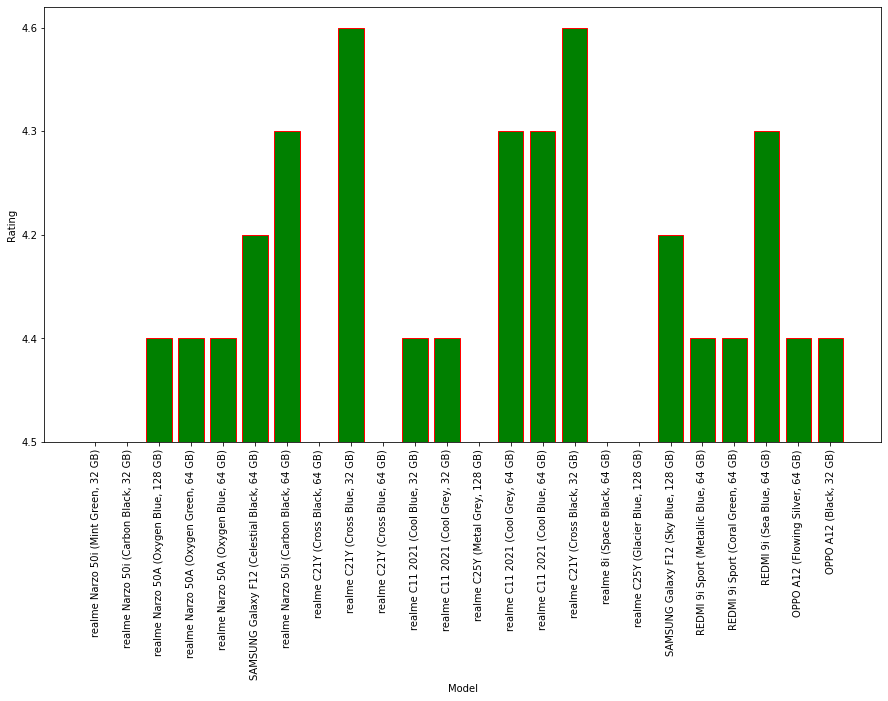

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(data['model'], data['star'],color='green',edgecolor='red')
plt.xlabel("Model")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

## count plot for reviews of all brands

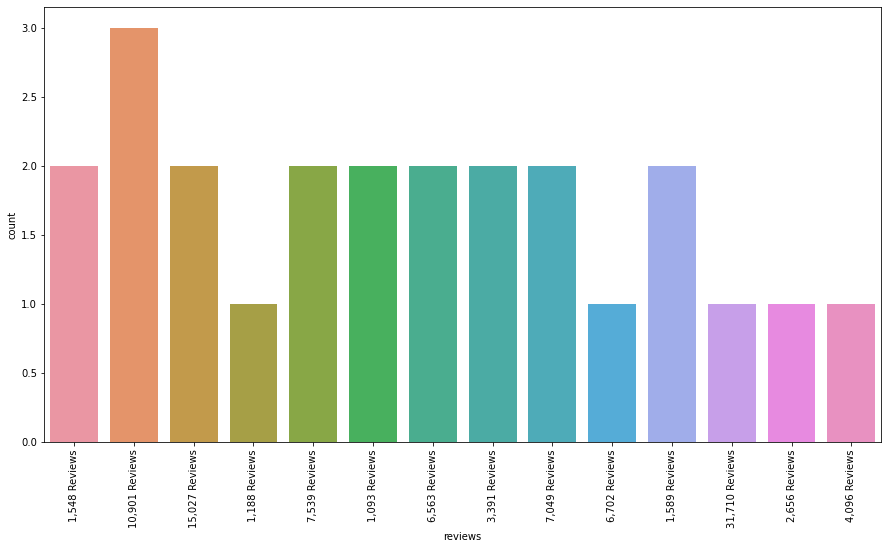

In [174]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='reviews', data=data)
ax
plt.xticks(rotation=90)
plt.show()

# top 10 mobiles

In [311]:
d.price = [x.strip(',') for x in d.price]

In [305]:
ndata=pd.DataFrame(data.iloc[:,[0]]).head(10)

In [306]:
ndata

,model
0,"realme Narzo 50i (Mint Green, 32 GB)"
1,"realme Narzo 50i (Carbon Black, 32 GB)"
2,"realme Narzo 50A (Oxygen Blue, 128 GB)"
3,"realme Narzo 50A (Oxygen Green, 64 GB)"
4,"realme Narzo 50A (Oxygen Blue, 64 GB)"
5,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)"
6,"realme Narzo 50i (Carbon Black, 64 GB)"
7,"realme C21Y (Cross Black, 64 GB)"
8,"realme C21Y (Cross Blue, 32 GB)"
9,"realme C21Y (Cross Blue, 64 GB)"


In [313]:
d1=d.head(10)
d1

,price
0,"7,499"
1,"7,499"
2,"12,499"
3,"11,499"
4,"11,499"
5,"9,499"
6,"8,999"
7,"10,499"
8,"9,499"
9,"10,499"


In [309]:
result = pd.concat([ndata, d1], axis=1, join='inner')
result

,model,price
0,"realme Narzo 50i (Mint Green, 32 GB)","7,499"
1,"realme Narzo 50i (Carbon Black, 32 GB)","7,499"
2,"realme Narzo 50A (Oxygen Blue, 128 GB)","12,499"
3,"realme Narzo 50A (Oxygen Green, 64 GB)","11,499"
4,"realme Narzo 50A (Oxygen Blue, 64 GB)","11,499"
5,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)","9,499"
6,"realme Narzo 50i (Carbon Black, 64 GB)","8,999"
7,"realme C21Y (Cross Black, 64 GB)","10,499"
8,"realme C21Y (Cross Blue, 32 GB)","9,499"
9,"realme C21Y (Cross Blue, 64 GB)","10,499"


# Conclusion

#### By analyzing the product model,  star, num_ratings, reviews, ram, storage, display, camera, battery, price using text mining we gathered most appeared positive  words using the word clouds. We can conclude that text mining gains insights.  This technique provides an opportunity to improve the overall customer experience.